# Linear Model Practice with boston-dataset

## Load Dataset

In [33]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd 

dataset = load_boston()
X = dataset.data
y = dataset.target.reshape(-1,1)
df = pd.DataFrame(np.hstack((X,y)),columns=[*dataset.feature_names,'PRICE'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/5)

## Hypthesis Function

In [44]:
def dummy(X):
    x0 = np.ones((len(X),1))
    return np.hstack((x0,X))
 

In [43]:
from numpy import matrix

def h(theta,X):
    return dummy(X)@theta

## Cost Function

In [48]:
def J(theta,X,y):
    X = dummy(X)
    m = len(X[0])
    E = X@theta-y
    return E.T@E/m/2

### Batch Gradient Decsent

In [50]:
def partial_J2theta(theta,X,y):
    X = dummy(X)
    m = len(X[0])
    return X.T@(X@theta-y)/m

In [114]:
def bgd(X,y,alpha,epoches=400):
    m = len(X[0])
    theta = np.random.rand(m+1,1)
    cost,iteration = [],[]
    for i in range(epoches):
        theta -= partial_J2theta(theta,X,y)*alpha
        if i % 10 is 0:
            iteration.append(i)
            cost.append(J(theta,X,y)[0,0])
    return {
        'theta':theta,
        'iteration':iteration,
        'cost-function':cost
    }

104.69651211405507

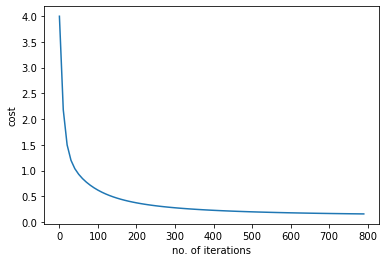

In [140]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()
_X = X_scaler.fit_transform(X)
_y = y_scaler.fit_transform(y)
_X_train,_X_test,_y_train,_y_test = train_test_split(_X,_y,test_size=1/5)

argmin_theta,iters,Js = bgd(_X_train,_y_train,.0003,800).values()

from matplotlib import pyplot as plt

plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.plot(iters,Js)

_y_predict = h(argmin_theta,_X_test)
y_predict = y_scaler.inverse_transform(_y_predict)
mean_squared_error(y_predict,y_test)

## Normal Equation Method

In [45]:
from numpy.linalg import pinv


def norm_eq_optim(X, y):
    X = dummy(X)
    return pinv(X.T@X)@X.T@y

In [46]:
argmin_theta = norm_eq_optim(X_train,y_train)
argmin_theta

array([[ 4.21888231e+01],
       [-8.32979709e-02],
       [ 4.84413997e-02],
       [ 3.56208701e-02],
       [ 2.03221525e+00],
       [-2.09891348e+01],
       [ 3.53177370e+00],
       [-1.78750979e-03],
       [-1.55116070e+00],
       [ 3.13126480e-01],
       [-1.16427145e-02],
       [-9.99206079e-01],
       [ 6.56585703e-03],
       [-5.55936925e-01]])

In [47]:
mean_squared_error(h(argmin_theta,X_test),y_test)

17.473333186166936

## Using sklearn 

In [23]:
from sklearn.linear_model import LinearRegression

sk_lrm = LinearRegression()
sk_lrm.fit(X_train,y_train)
sk_lrm.score(X_test,y_test)

0.7577220159971674

In [25]:
mean_squared_error(sk_lrm.predict(X_test),y_test)

17.473333185560694

In [27]:
sk_lrm.coef_,sk_lrm.intercept_

(array([[-8.32979709e-02,  4.84413997e-02,  3.56208701e-02,
          2.03221525e+00, -2.09891348e+01,  3.53177370e+00,
         -1.78750979e-03, -1.55116070e+00,  3.13126480e-01,
         -1.16427145e-02, -9.99206079e-01,  6.56585703e-03,
         -5.55936925e-01]]),
 array([42.18882314]))